In [ ]:
project overview

Effective sales management is vital in today's competitive landscape. 

 This project tackles sales trend analysis on an Amazon dataset.

In this my role is to process sales data to uncover trend to gain valuable insights for strategic decision-making.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Amazon Sales data.csv')
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [436]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [437]:
df.isnull().sum() 

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [438]:
df.duplicated().sum()

0

In [439]:
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [440]:
# correlation
df[['Units Sold','Unit Price','Unit Cost','Total Revenue','Total Cost','Total Profit']].corr()

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
Units Sold,1.000000,-0.070486,-0.092232,0.447784,0.374746,0.564550
Unit Price,-0.070486,1.000000,0.987270,0.752360,0.787905,0.557365
Unit Cost,-0.092232,0.987270,1.000000,0.715623,0.774895,0.467214
Total Revenue,0.447784,0.752360,0.715623,1.000000,0.983928,0.897327
Total Cost,0.374746,0.787905,0.774895,0.983928,1.000000,0.804091
Total Profit,0.564550,0.557365,0.467214,0.897327,0.804091,1.000000


In [441]:
----> NEW  COLUMNS

SyntaxError: invalid syntax (167721991.py, line 1)

In [442]:
#extracting the month
df['Order Date']=pd.to_datetime(df['Order Date'])

In [443]:
df.sample()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
66,Sub-Saharan Africa,Gabon,Personal Care,Offline,L,2012-07-08,228944623,7/9/2012,8656,81.73,56.67,707454.88,490535.52,216919.36


In [444]:
df['month m']=pd.to_datetime(df['Order Date']).dt.month

In [445]:
df.sample()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,month m
51,Sub-Saharan Africa,Lesotho,Fruits,Online,L,2013-08-18,918419539,9/18/2013,9606,9.33,6.92,89623.98,66473.52,23150.46,8


In [446]:
df['day m']=pd.to_datetime(df['Order Date']).dt.day


In [448]:
df.sample()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,month m,day m
12,Asia,Bangladesh,Clothes,Online,L,2017-01-13,187310731,3/1/2017,8263,109.28,35.84,902980.64,296145.92,606834.72,1,13


In [449]:
df['year m']=pd.to_datetime(df['Order Date']).dt.year

In [450]:
df.sample()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,month m,day m,year m
55,Sub-Saharan Africa,Cote d'Ivoire,Clothes,Online,C,2012-06-08,114606559,6/27/2012,3482,109.28,35.84,380512.96,124794.88,255718.08,6,8,2012


In [451]:
df['year m'].unique()

array([2010, 2012, 2014, 2013, 2015, 2011, 2017, 2016])

In [452]:
df['year m'].nunique()

8

In [453]:
#IN WHICH MONTH SALES IS MORE(units sold)
df.groupby('month m')['Units Sold'].sum().sort_values(ascending=False)

month m
7     76201
2     71079
5     63651
10    55472
11    53261
4     44680
1     35742
6     34893
9     30101
8     17251
12    16043
3     14497
Name: Units Sold, dtype: int64

<Axes: xlabel='month m'>

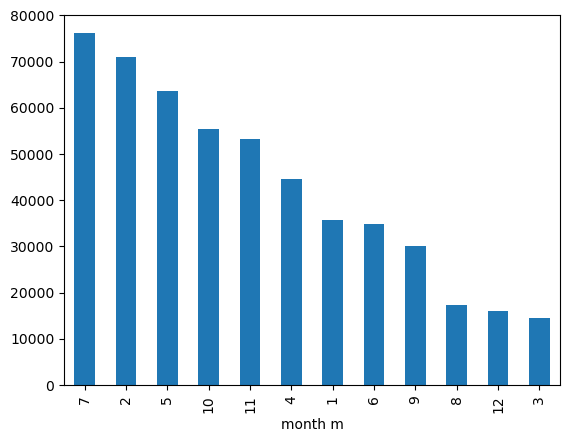

In [454]:
df.groupby('month m')['Units Sold'].sum().sort_values(ascending=False).plot(kind='bar')

In [455]:
df['month name m']=pd.to_datetime(df['Order Date']).dt.month_name()

In [456]:
df.sample()


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,month m,day m,year m,month name m
81,Middle East and North Africa,Lebanon,Clothes,Online,L,2012-09-18,663110148,10/8/2012,7884,109.28,35.84,861563.52,282562.56,579000.96,9,18,2012,September


<Axes: xlabel='month name m'>

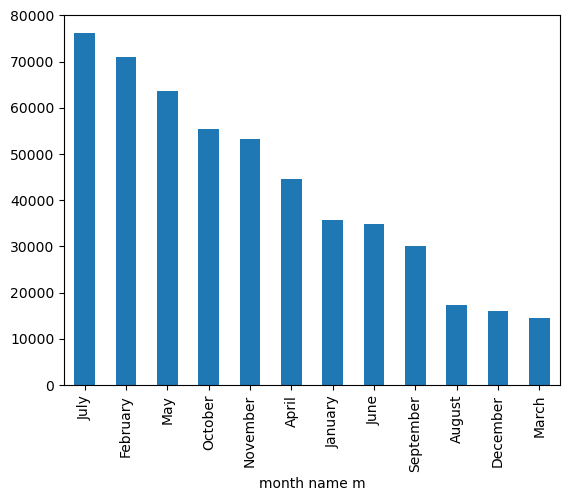

In [457]:
df.groupby('month name m')['Units Sold'].sum().sort_values(ascending=False).plot(kind='bar')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

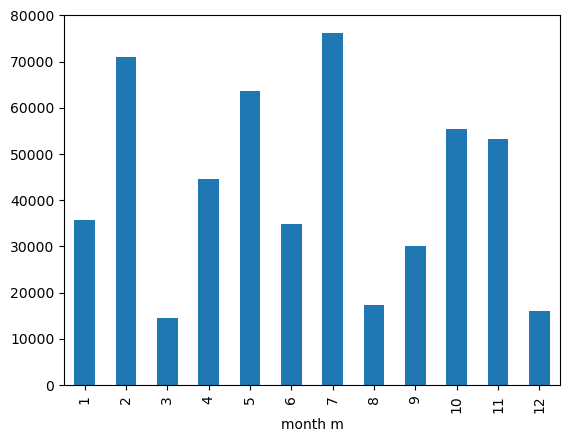

In [458]:
df.groupby('month m')['Units Sold'].sum().plot(kind='bar')
plt.xticks()

In [459]:
# or

In [460]:
import calendar
months=calendar.month_name[1:]
months

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

([<matplotlib.axis.XTick at 0x22a7f66cd10>,
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

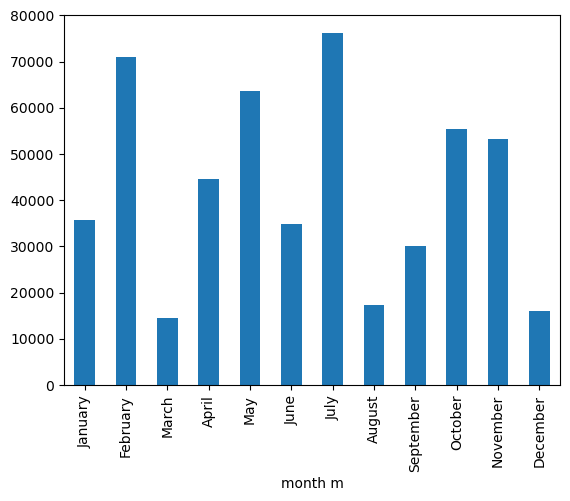

In [462]:
df.groupby('month m')['Units Sold'].sum().plot(kind='bar')
plt.xticks(np.arange(0,12),calendar.month_name[1:])
#so sabse jyada sells(units sold) hui hai july mai all over years 

In [29]:
df['year m'].unique()


array([2010, 2012, 2014, 2013, 2015, 2011, 2017, 2016])

In [463]:
-----> in month  of july highest sales was there throughout the years [2010 - 2017]

SyntaxError: invalid syntax (591327052.py, line 1)

In [464]:
#which year highest unit sold
df.groupby('year m')['Units Sold'].sum()

year m
2010    61571
2011    54768
2012    97967
2013    64663
2014    92040
2015    49480
2016    43156
2017    49226
Name: Units Sold, dtype: int64

<Axes: xlabel='year m'>

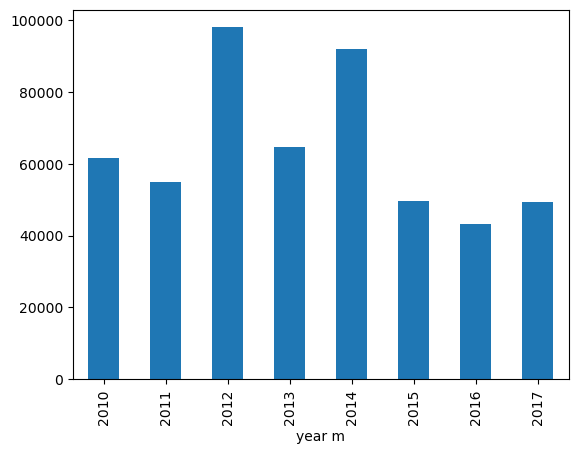

In [465]:
df.groupby('year m')['Units Sold'].sum().plot(kind='bar')

<Axes: xlabel='year m'>

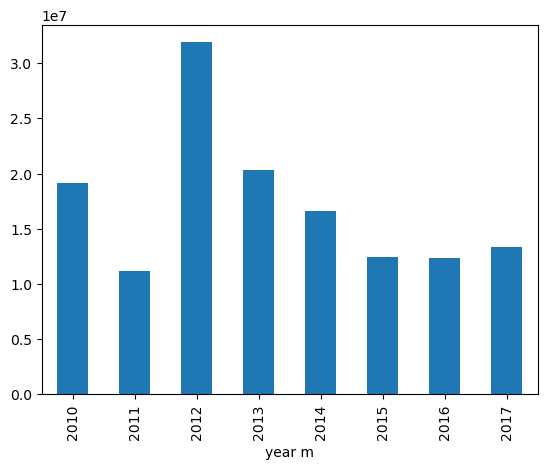

In [466]:
#which year maximum revenue generated
df.groupby('year m')['Total Revenue'].sum().plot(kind='bar')

In [467]:
#in which year which month most items sold
df.groupby(['year m','month name m'])['Units Sold'].sum().sort_values(ascending=False)

year m  month name m
2012    July            22646
2014    October         22619
2013    July            19546
2011    November        19026
2017    May             16880
2012    September       16545
2017    February        16301
2012    February        15776
2010    May             15747
2014    July            14513
2010    October         14403
2014    April           13808
2016    November        13441
2015    July            13110
2017    January         13030
2011    January         12914
2015    April           12772
2012    May             10984
2014    February        10460
2010    June             9905
2016    December         9815
2013    August           9606
2010    February         9503
2014    May              9229
2012    April            8903
2015    January          8250
2011    February         8156
2014    June             8102
2010    November         7910
2013    September        7637
2012    June             7620
2014    November         6954
2012    March      

In [468]:
df.groupby(['year m','month name m'])['Units Sold'].sum().sort_values(ascending=False).reset_index()

,year m,month name m,Units Sold
0,2012,July,22646
1,2014,October,22619
2,2013,July,19546
3,2011,November,19026
4,2017,May,16880
5,2012,September,16545
6,2017,February,16301
7,2012,February,15776
8,2010,May,15747
9,2014,July,14513


In [469]:
xy=df.groupby(['year m','month name m'])['Units Sold'].sum().sort_values(ascending=False).reset_index().drop_duplicates(['year m']).sort_values('year m').reset_index()
xy=xy.drop(columns='index')
xy

,year m,month name m,Units Sold
0,2010,May,15747
1,2011,November,19026
2,2012,July,22646
3,2013,July,19546
4,2014,October,22619
5,2015,July,13110
6,2016,November,13441
7,2017,May,16880


In [470]:
df.groupby(['year m','month name m'])['Units Sold'].sum().sort_values(ascending=False).reset_index().drop_duplicates(['year m'],keep='first')

,year m,month name m,Units Sold
0,2012,July,22646
1,2014,October,22619
2,2013,July,19546
3,2011,November,19026
4,2017,May,16880
8,2010,May,15747
12,2016,November,13441
13,2015,July,13110


In [471]:
# MAXIMUM SALES IN WHICH MONTH IN A YEAR 

<Axes: xlabel='year m', ylabel='Units Sold'>

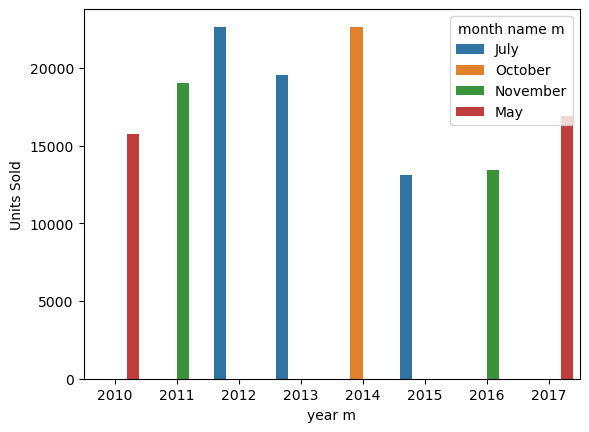

In [472]:
x=df.groupby(['year m','month name m'])['Units Sold'].sum().sort_values(ascending=False).reset_index().drop_duplicates(['year m'],keep='first')
sns.barplot(x='year m',y='Units Sold',data=x,hue='month name m')

matplotlib.axes._axes.Axes

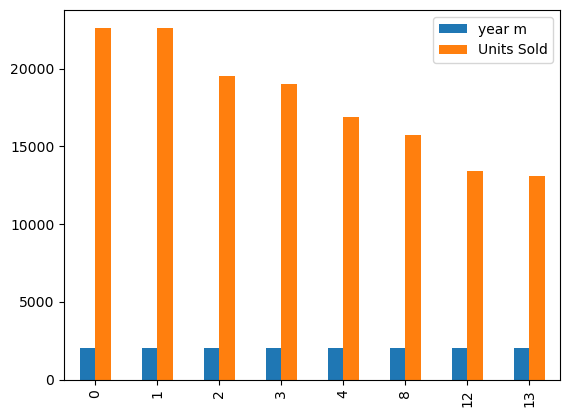

In [473]:
xes=df.groupby(['year m','month name m'])['Units Sold'].sum().sort_values(ascending=False).reset_index().drop_duplicates(['year m'],keep='first').plot(kind='bar')
type(xes)

In [474]:
 #or

In [475]:
new=df.groupby(['year m','month name m'])['Units Sold'].sum().sort_values(ascending=False).reset_index().drop_duplicates(['year m'],keep='first')
type(new)

pandas.core.frame.DataFrame

In [476]:
new.pivot_table(index='year m',columns='month name m',values='Units Sold')

month name m,July,May,November,October
year m,,,,
2010,NaN,15747.0,NaN,NaN
2011,NaN,NaN,19026.0,NaN
2012,22646.0,NaN,NaN,NaN
2013,19546.0,NaN,NaN,NaN
2014,NaN,NaN,NaN,22619.0
2015,13110.0,NaN,NaN,NaN
2016,NaN,NaN,13441.0,NaN
2017,NaN,16880.0,NaN,NaN


<Axes: xlabel='year m'>

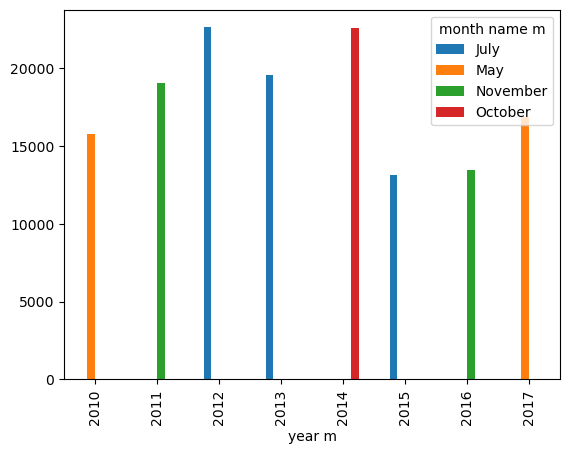

In [477]:
new.pivot_table(index='year m',columns='month name m',values='Units Sold').plot(kind='bar')

In [478]:
#adding a column profit margin
def pro_margin(a):
    unit_price=a['Unit Price']
    unit_cost=a['Unit Cost']
    return unit_price - unit_cost

In [479]:
df.apply(pro_margin,axis=1)

0      95.86
1      88.59
2     126.25
3       2.41
4     126.25
       ...  
95     73.44
96      2.41
97     63.13
98     25.06
99    165.73
Length: 100, dtype: float64

In [480]:
df['profit margin m']=df.apply(pro_margin,axis=1)

In [481]:
df.head(10)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,month m,day m,year m,month name m,profit margin m
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,28,2010,May,95.86
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,8,22,2012,August,88.59
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,2,2014,May,126.25
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,6,20,2014,June,2.41
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2,1,2013,February,126.25
5,Australia and Oceania,Solomon Islands,Baby Food,Online,C,2015-02-04,547995746,2/21/2015,2974,255.28,159.42,759202.72,474115.08,285087.64,2,4,2015,February,95.86
6,Sub-Saharan Africa,Angola,Household,Offline,M,2011-04-23,135425221,4/27/2011,4187,668.27,502.54,2798046.49,2104134.98,693911.51,4,23,2011,April,165.73
7,Sub-Saharan Africa,Burkina Faso,Vegetables,Online,H,2012-07-17,871543967,7/27/2012,8082,154.06,90.93,1245112.92,734896.26,510216.66,7,17,2012,July,63.13
8,Sub-Saharan Africa,Republic of the Congo,Personal Care,Offline,M,2015-07-14,770463311,8/25/2015,6070,81.73,56.67,496101.10,343986.90,152114.20,7,14,2015,July,25.06
9,Sub-Saharan Africa,Senegal,Cereal,Online,H,2014-04-18,616607081,5/30/2014,6593,205.70,117.11,1356180.10,772106.23,584073.87,4,18,2014,April,88.59


<Axes: xlabel='year m'>

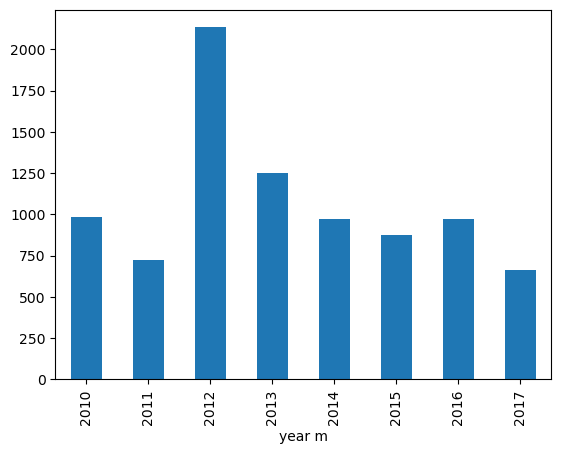

In [482]:
#which year maximum profit margin generated
df.groupby('year m')['profit margin m'].sum().plot(kind='bar')

In [483]:
NEW COLUMNS --> 

month extraction
day extraction
year extraction
profit margin


SyntaxError: invalid syntax (3996058055.py, line 1)

In [484]:
df.sample(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,month m,day m,year m,month name m,profit margin m
73,Sub-Saharan Africa,Djibouti,Cereal,Online,H,2017-05-20,555990016,6/17/2017,8656,205.70,117.11,1780539.20,1013704.16,766835.04,5,20,2017,May,88.59
23,Australia and Oceania,New Zealand,Fruits,Online,H,2014-09-08,142278373,10/4/2014,2187,9.33,6.92,20404.71,15134.04,5270.67,9,8,2014,September,2.41
30,Europe,Switzerland,Cosmetics,Offline,M,2012-09-17,249693334,10/20/2012,8661,437.20,263.33,3786589.20,2280701.13,1505888.07,9,17,2012,September,173.87
93,Europe,Romania,Cosmetics,Online,H,2010-11-26,660643374,12/25/2010,7910,437.20,263.33,3458252.00,2082940.30,1375311.70,11,26,2010,November,173.87
12,Asia,Bangladesh,Clothes,Online,L,2017-01-13,187310731,3/1/2017,8263,109.28,35.84,902980.64,296145.92,606834.72,1,13,2017,January,73.44


# EDA  (EXPLORATORY DATA ANALYISIS )

In [485]:
1)DESCRIPTIVE STATISTICS

SyntaxError: unmatched ')' (2960098935.py, line 1)

In [486]:
# UNIVARIATE ANALYSIS

In [487]:
1)DESCRIPTIVE STATISTICS

SyntaxError: unmatched ')' (2960098935.py, line 1)

In [488]:
#calculate summary stastistics(mean,mededian,standard deviation...)
df.describe()

,Order Date,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,month m,day m,year m,profit margin m
count,100,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,100.000000,100.000000,100.000000
mean,2013-09-16 14:09:36,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05,6.260000,16.500000,2013.230000,85.713300
min,2010-02-02 00:00:00,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03,1.000000,1.000000,2010.000000,2.410000
25%,2012-02-14 12:00:00,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05,4.000000,8.000000,2012.000000,25.060000
50%,2013-07-12 12:00:00,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05,6.000000,17.000000,2013.000000,73.440000
75%,2015-04-07 00:00:00,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05,9.250000,24.250000,2015.000000,126.250000
max,2017-05-22 00:00:00,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06,12.000000,31.000000,2017.000000,173.870000
std,NaN,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05,3.353334,8.997755,2.088231,58.087623


In [489]:
#use of frequency tables to understand the distribution of categorical variables like region,country,item type
df['Region'].value_counts()

Region
Sub-Saharan Africa                   36
Europe                               22
Australia and Oceania                11
Asia                                 11
Middle East and North Africa         10
Central America and the Caribbean     7
North America                         3
Name: count, dtype: int64

<Axes: xlabel='Region'>

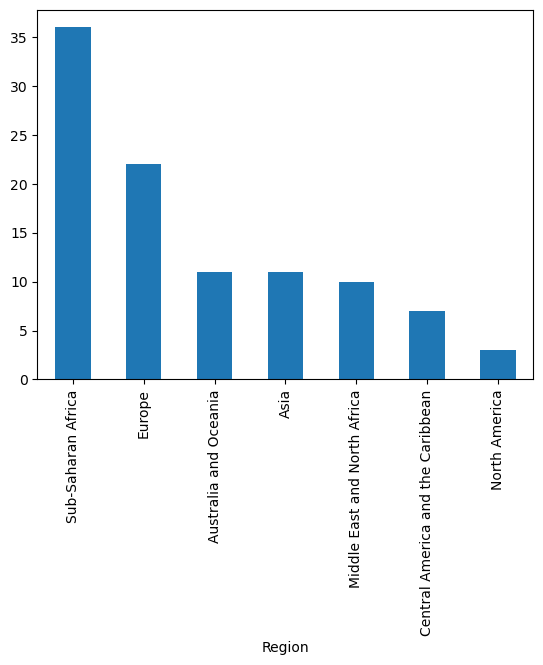

In [490]:
x=df['Region'].value_counts()
x.plot(kind='bar')

In [491]:
df['Item Type'].value_counts()

Item Type
Clothes            13
Cosmetics          13
Office Supplies    12
Fruits             10
Personal Care      10
Household           9
Beverages           8
Baby Food           7
Cereal              7
Vegetables          6
Snacks              3
Meat                2
Name: count, dtype: int64

<Axes: xlabel='Item Type'>

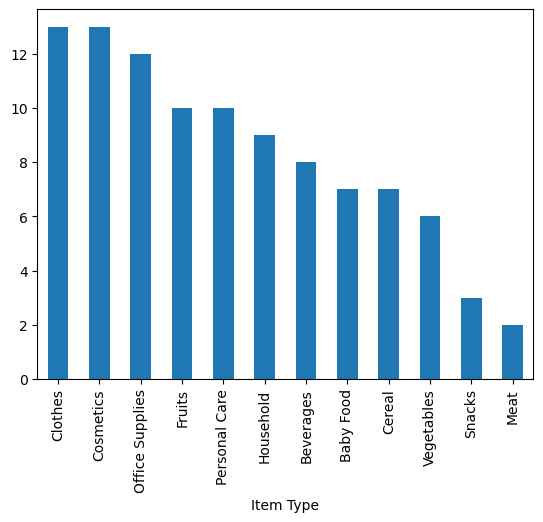

In [492]:
y=df['Item Type'].value_counts()
y.plot(kind='bar')

In [493]:
df['Country'].value_counts()

Country
The Gambia               4
Sierra Leone             3
Sao Tome and Principe    3
Mexico                   3
Australia                3
                        ..
Comoros                  1
Iceland                  1
Macedonia                1
Mauritania               1
Mozambique               1
Name: count, Length: 76, dtype: int64

<Axes: xlabel='Country'>

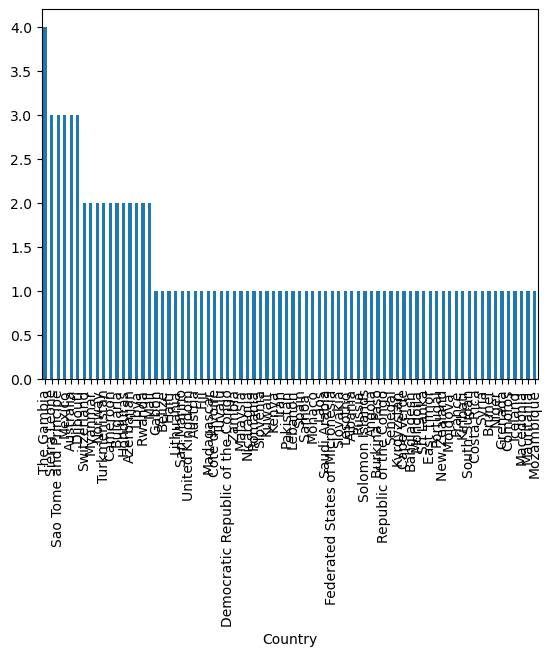

In [494]:
z=df['Country'].value_counts()
z.plot(kind='bar')

In [495]:
2)CORRELATION ANALYSIS

SyntaxError: unmatched ')' (1969644641.py, line 1)

In [496]:
#MEASURE THE STRENGTH AND DIRECTION OF THE LINEAR RELATIONSHIP BETWEEN PAIRS OF VARIABLES
#(EG CORRELATION BETWEEN UNIT PRICE AND UNITS SOLD)

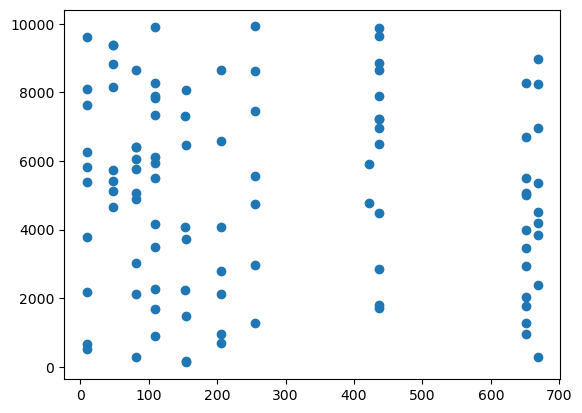

In [497]:
plt.scatter(df['Unit Price'],df['Units Sold'])  #not good

C:\Users\sahus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


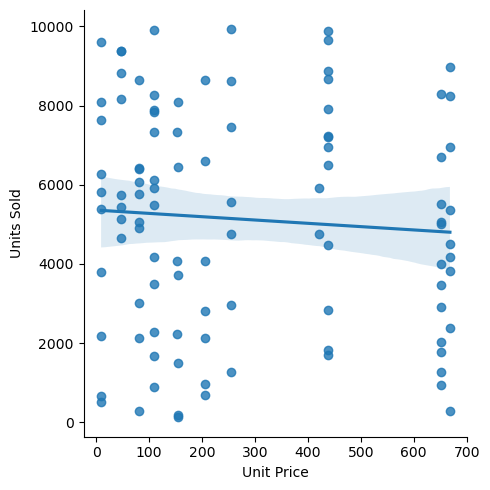

In [498]:
sns.lmplot(x='Unit Price',y='Units Sold',data=df)

C:\Users\sahus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


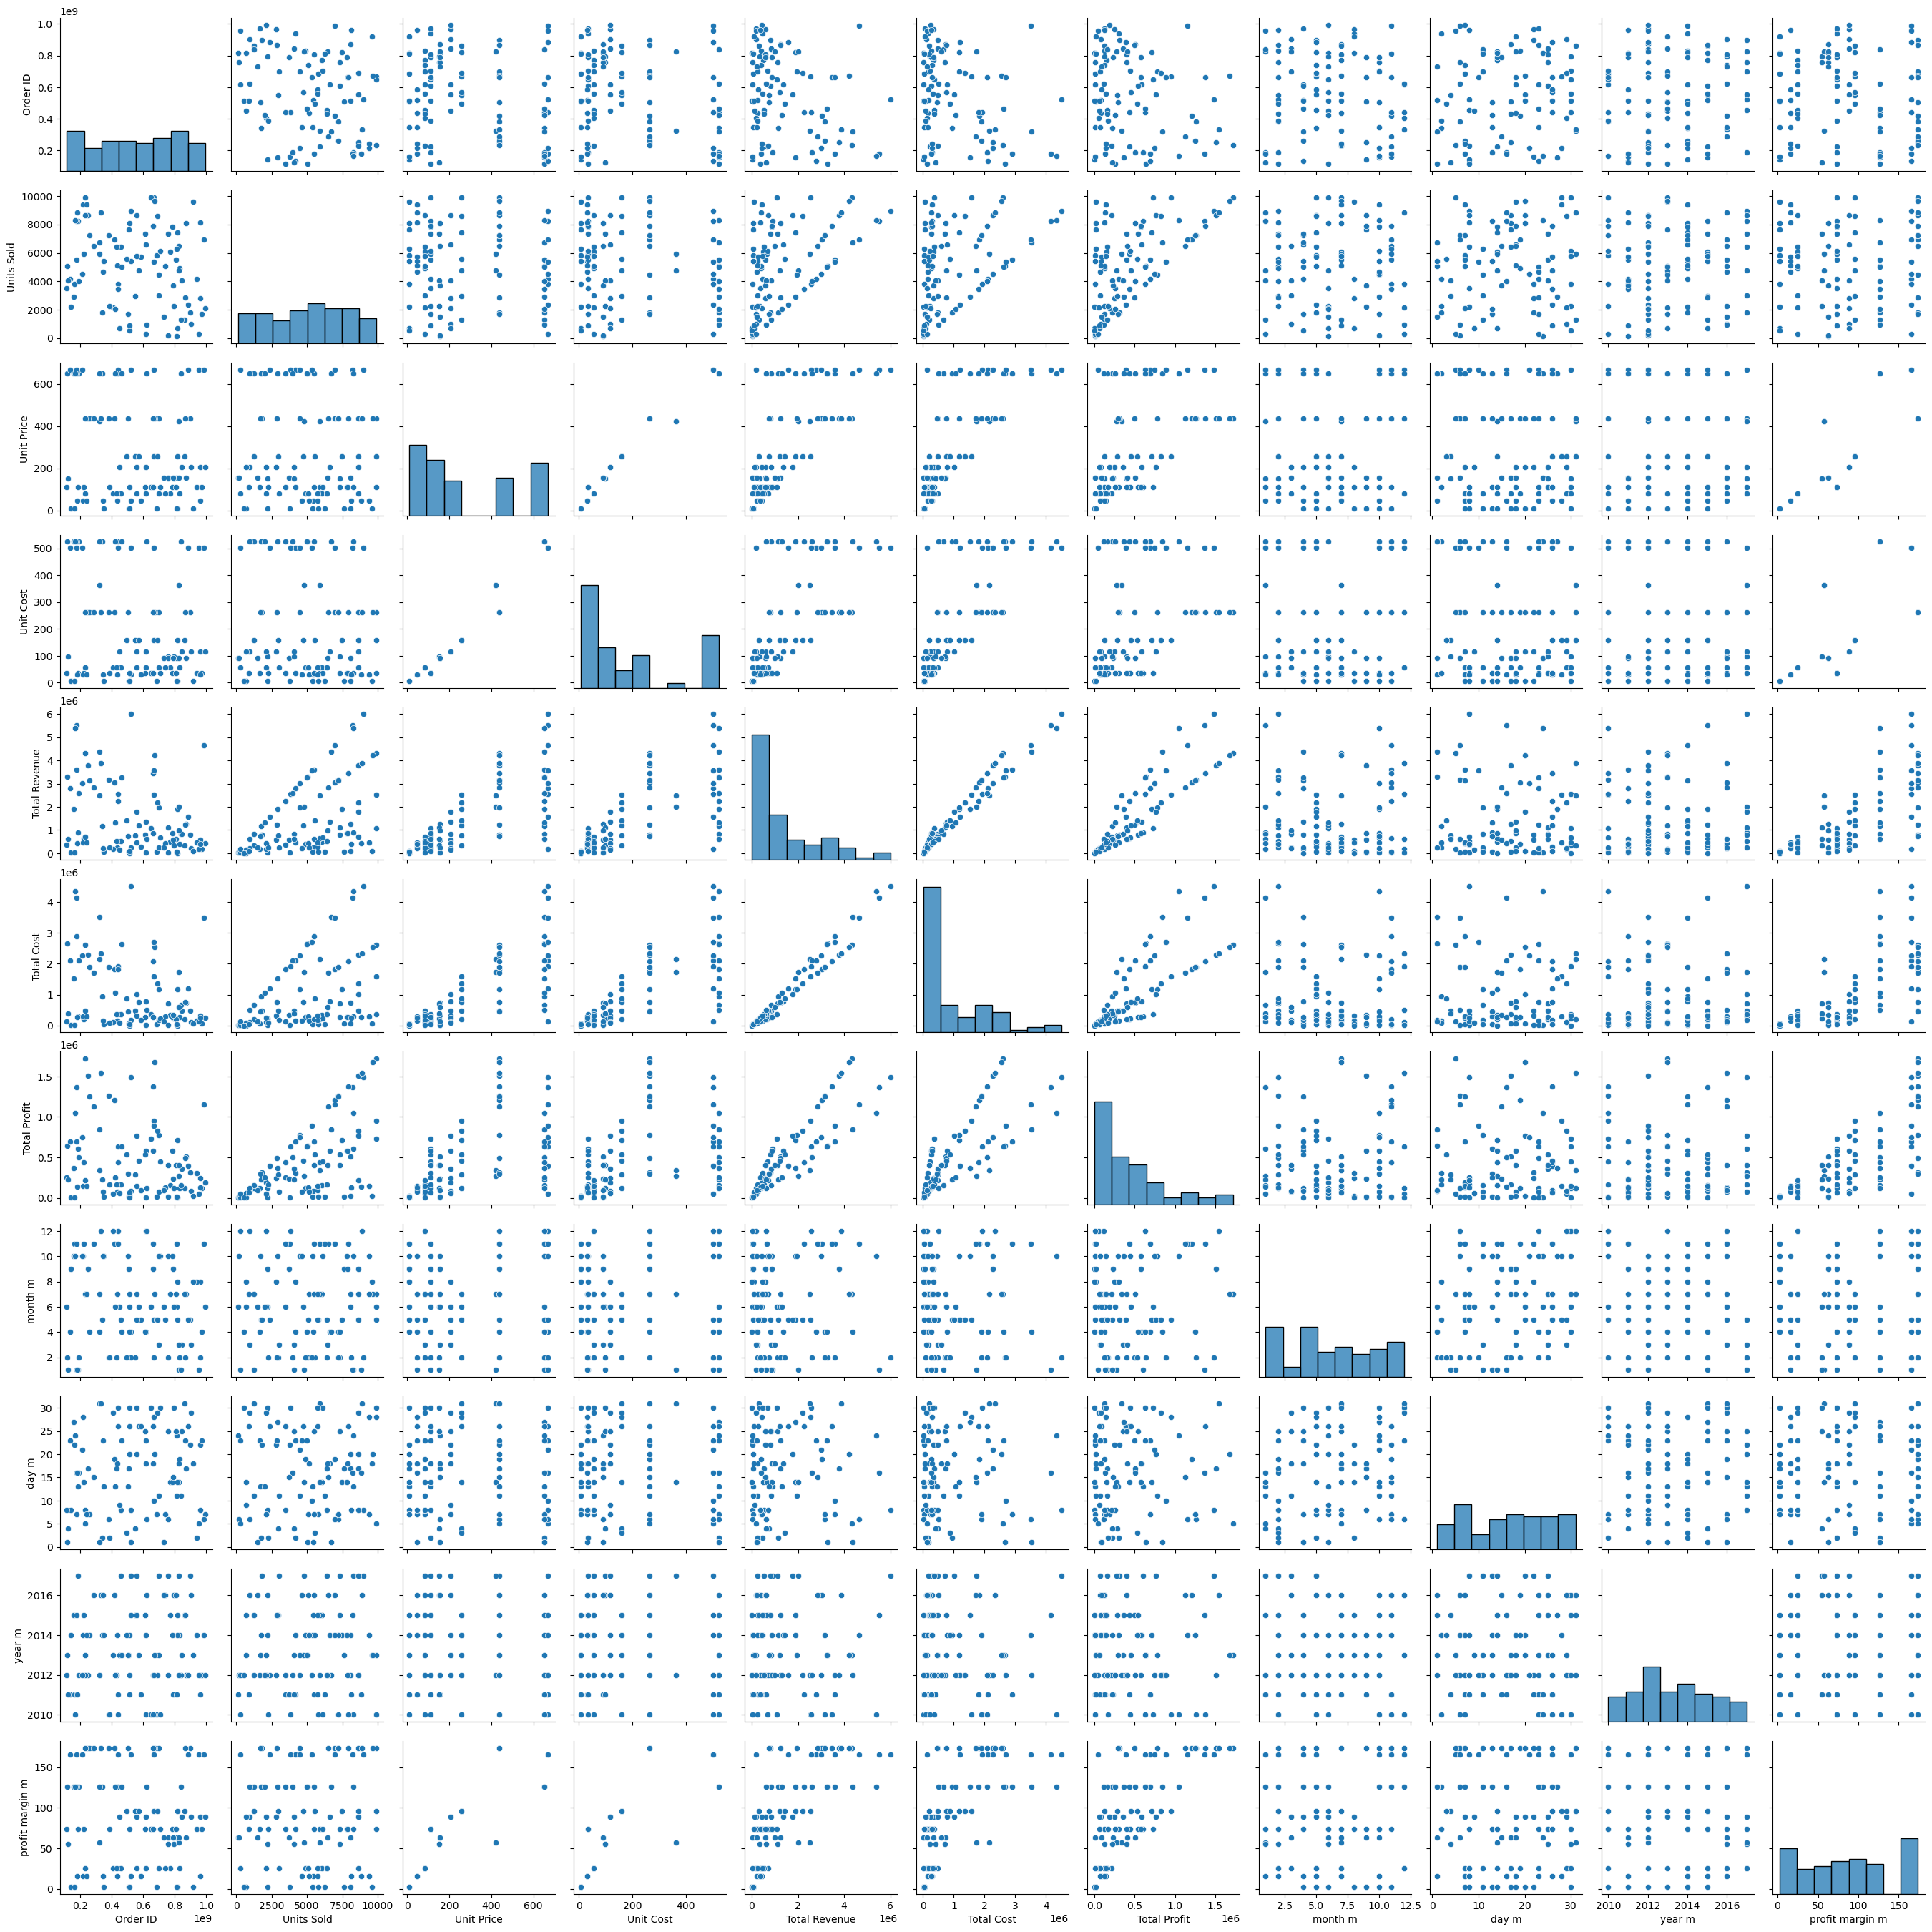

In [500]:
sns.pairplot(df)

In [501]:
#identify potential relationship  between variables that might influence sales or profitability


In [513]:
df.head(2)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,month m,day m,year m,month name m,profit margin m
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.0,1582243.50,951410.50,5,28,2010,May,95.86
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.8,328376.44,248406.36,8,22,2012,August,88.59


C:\Users\sahus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


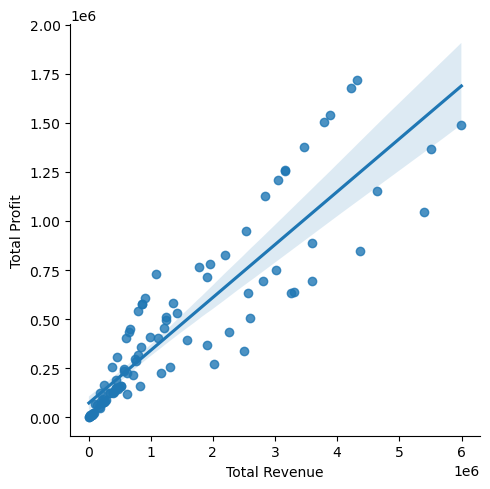

In [514]:
#finding relation between total revenue and total profit
sns.lmplot(x='Total Revenue',y='Total Profit',data=df)
#conclusion-> as sales(total revenue) is increasing the profit is also increasing

In [515]:
df.head(2)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,month m,day m,year m,month name m,profit margin m
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.0,1582243.50,951410.50,5,28,2010,May,95.86
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.8,328376.44,248406.36,8,22,2012,August,88.59


C:\Users\sahus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


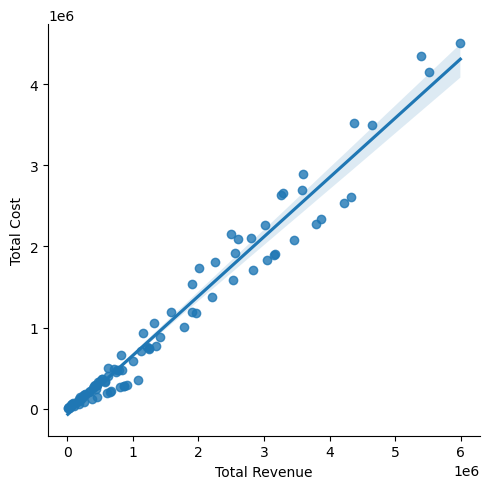

In [516]:
#finding relation between total revenue and total cost
sns.lmplot(x='Total Revenue',y='Total Cost',data=df)

4)SEGMENTATION 

In [518]:
#GROUP DATA BY RELEVENT CATEGORIES(REGION ,ITEM TYPE,SALES CHANNEL) TO ANALYSE THE TRENDS AND RELATIONSHIPDS WITH EACH GROUP

In [519]:
df.groupby('Region')['Item Type'].value_counts()

Region                             Item Type      
Asia                               Household          2
                                   Office Supplies    2
                                   Vegetables         2
                                   Clothes            2
                                   Fruits             1
                                   Personal Care      1
                                   Cosmetics          1
Australia and Oceania              Baby Food          2
                                   Beverages          2
                                   Fruits             2
                                   Meat               1
                                   Cosmetics          1
                                   Cereal             1
                                   Clothes            1
                                   Office Supplies    1
Central America and the Caribbean  Cereal             1
                                   Clothes           

In [520]:
df.groupby('Region')['Sales Channel'].value_counts()

Region                             Sales Channel
Asia                               Offline           6
                                   Online            5
Australia and Oceania              Online            7
                                   Offline           4
Central America and the Caribbean  Offline           5
                                   Online            2
Europe                             Online           13
                                   Offline           9
Middle East and North Africa       Online            8
                                   Offline           2
North America                      Offline           3
Sub-Saharan Africa                 Offline          21
                                   Online           15
Name: count, dtype: int64

<Axes: xlabel='Region'>

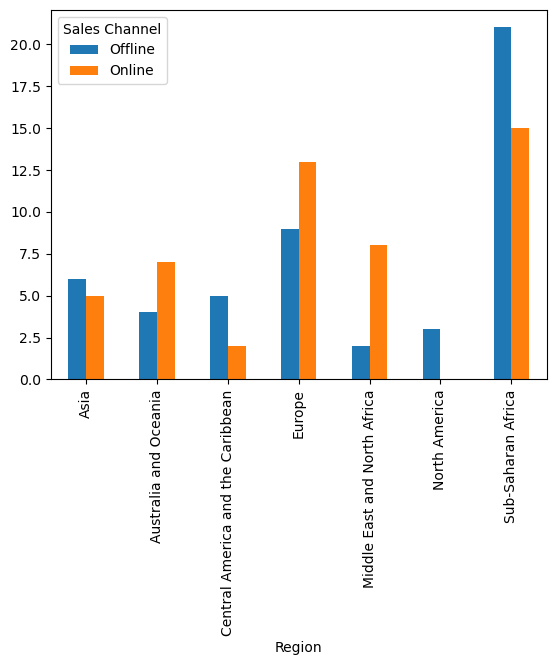

In [521]:
df.groupby('Region')['Sales Channel'].value_counts().unstack().plot(kind='bar')

In [522]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit', 'month m',
       'day m', 'year m', 'month name m', 'profit margin m'],
      dtype='object')

In [523]:
5)DATA VISUALIZATION (scatter plot , bar charts , heatmaps .........)

SyntaxError: unmatched ')' (1937227373.py, line 1)

<Axes: xlabel='Units Sold', ylabel='Count'>

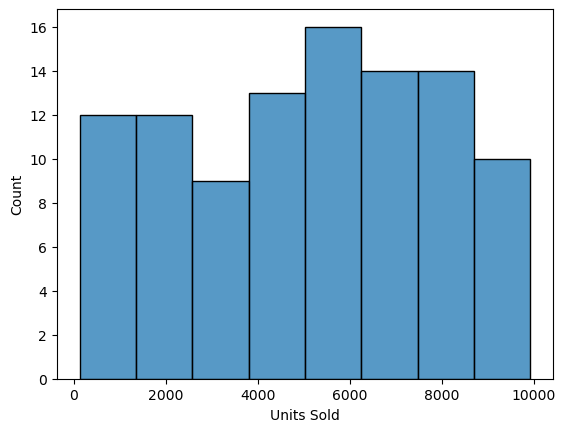

In [524]:
sns.histplot(x='Units Sold',data=df)

<Axes: xlabel='Units Sold', ylabel='Density'>

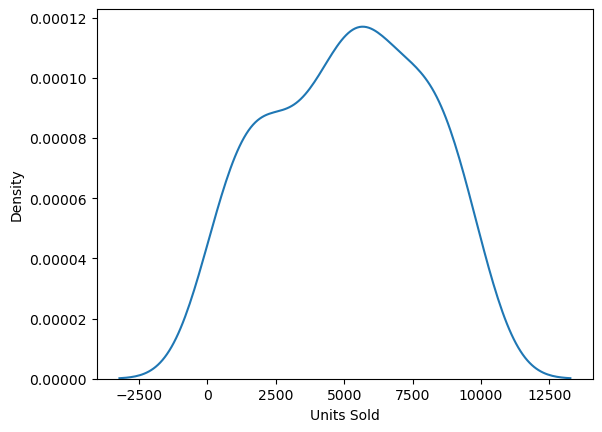

In [525]:
sns.kdeplot(x='Units Sold',data=df)

<Axes: xlabel='profit margin m', ylabel='Count'>

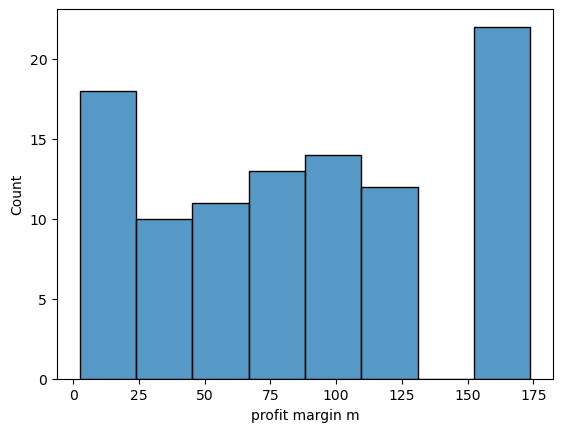

In [526]:
sns.histplot(x='profit margin m',data=df)

<Axes: xlabel='profit margin m', ylabel='Density'>

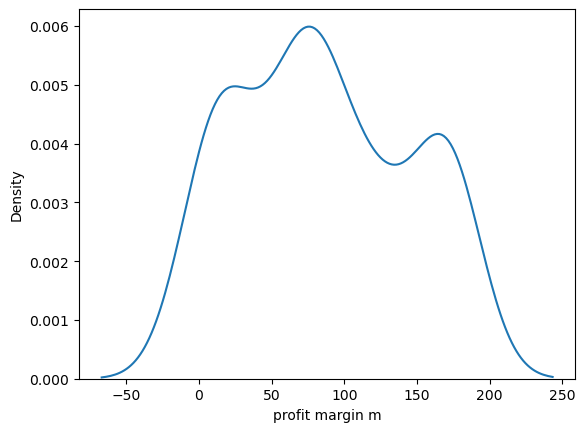

In [527]:
sns.kdeplot(x='profit margin m',data=df)

In [528]:
QUESTIONS TO FIND RELATIONSHIPS

SyntaxError: invalid syntax (3160338077.py, line 1)

In [529]:
1)REGIONAL ANALYSIS

SyntaxError: unmatched ')' (2190013420.py, line 1)

In [530]:
#HOW DO SALES AND PROFITABILITY VARY ACROSS DIFFERENT REGIONS AND COUNTRIES
df.groupby('Region')[['Total Revenue','profit margin m']].sum()

,Total Revenue,profit margin m
Region,,
Asia,21347091.02,1058.44
Australia and Oceania,14094265.13,747.21
Central America and the Caribbean,9170385.49,597.49
Europe,33368932.11,2327.89
Middle East and North Africa,14052706.58,890.56
North America,5643356.55,215.85
Sub-Saharan Africa,39672031.43,2733.89


<Axes: xlabel='Region'>

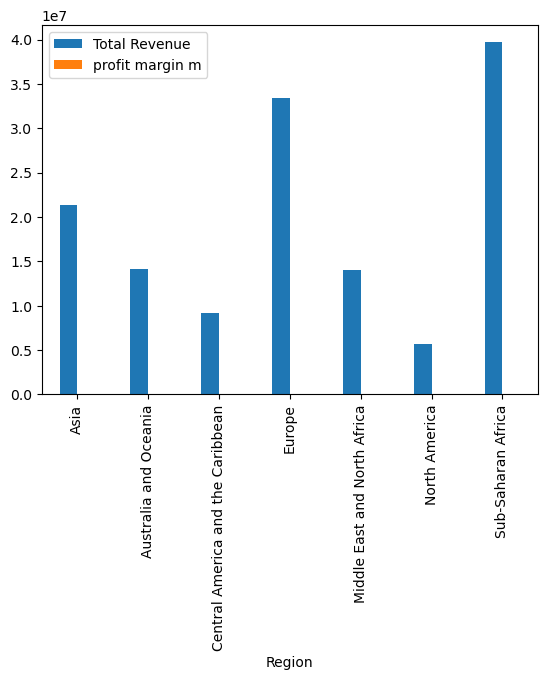

In [531]:
df.groupby('Region')[['Total Revenue','profit margin m']].sum().plot(kind='bar')

In [532]:
df.groupby('Country')[['Total Revenue','profit margin m']].sum()

,Total Revenue,profit margin m
Country,,
Albania,247956.32,73.44
Angola,2798046.49,165.73
Australia,2489933.49,230.50
Austria,1244708.40,173.87
Azerbaijan,4478800.21,300.12
...,...,...
The Gambia,5449517.95,407.38
Turkmenistan,5822036.20,291.98
Tuvalu,2533654.00,95.86


In [533]:
df.groupby(['Region','Country'])[['Total Revenue','profit margin m']].sum()

Total Revenue  profit margin m
Region             Country                                     
Asia               Bangladesh        902980.64            73.44
                   Brunei           4368316.68           126.25
                   Kyrgyzstan         19103.44            63.13
                   Laos              574951.92            63.13
                   Malaysia           58471.11             2.41
...                                        ...              ...
Sub-Saharan Africa Senegal          1356180.10            88.59
                   Sierra Leone     3097359.15           315.63
                   South Sudan       173676.25            25.06
                   The Gambia       5449517.95           407.38
                   Zambia            623289.30            55.14

[76 rows x 2 columns]

In [534]:
#ARE THERE REGIONAL DIFFERENCES IN CUSTOMER BEHAVIOUR (AVERAGE ORDER VALUE,PREFERED ITEM TYPES)

In [535]:
df.groupby(['Region'])['Item Type'].value_counts()

Region                             Item Type      
Asia                               Household          2
                                   Office Supplies    2
                                   Vegetables         2
                                   Clothes            2
                                   Fruits             1
                                   Personal Care      1
                                   Cosmetics          1
Australia and Oceania              Baby Food          2
                                   Beverages          2
                                   Fruits             2
                                   Meat               1
                                   Cosmetics          1
                                   Cereal             1
                                   Clothes            1
                                   Office Supplies    1
Central America and the Caribbean  Cereal             1
                                   Clothes           

In [537]:
df['Item Type'].value_counts()

Item Type
Clothes            13
Cosmetics          13
Office Supplies    12
Fruits             10
Personal Care      10
Household           9
Beverages           8
Baby Food           7
Cereal              7
Vegetables          6
Snacks              3
Meat                2
Name: count, dtype: int64

In [538]:
df.head(2)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,month m,day m,year m,month name m,profit margin m
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.0,1582243.50,951410.50,5,28,2010,May,95.86
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.8,328376.44,248406.36,8,22,2012,August,88.59


In [539]:
2)ITEM PERFORMANCE

SyntaxError: unmatched ')' (426987541.py, line 1)

In [540]:
#WHICH ITEM TYPES GENERATE THE HIGHEST SALES AND REVENUE
df.groupby(['Item Type'])[['Total Revenue','profit margin m']].sum()

,Total Revenue,profit margin m
Item Type,,
Baby Food,10350327.60,671.02
Beverages,2690794.60,125.28
Cereal,5322898.90,620.13
Clothes,7787292.80,954.72
Cosmetics,36601509.60,2260.31
Fruits,466481.34,24.10
Household,29889712.29,1491.57
Meat,4503675.75,114.40
Office Supplies,30585380.07,1515.00


In [541]:
df[df['Item Type']=='Cosmetics']

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,month m,day m,year m,month name m,profit margin m
16,Asia,Sri Lanka,Cosmetics,Offline,M,2016-11-19,419123971,12/18/2016,6952,437.2,263.33,3039414.4,1830670.16,1208744.24,11,19,2016,November,173.87
25,Europe,France,Cosmetics,Online,H,2017-05-22,898523128,6/5/2017,1815,437.2,263.33,793518.0,477943.95,315574.05,5,22,2017,May,173.87
30,Europe,Switzerland,Cosmetics,Offline,M,2012-09-17,249693334,10/20/2012,8661,437.2,263.33,3786589.2,2280701.13,1505888.07,9,17,2012,September,173.87
41,Middle East and North Africa,Azerbaijan,Cosmetics,Online,M,2010-02-06,382392299,2/25/2010,7234,437.2,263.33,3162704.8,1904929.22,1257775.58,2,6,2010,February,173.87
46,Europe,Iceland,Cosmetics,Online,C,2016-12-31,331438481,12/31/2016,8867,437.2,263.33,3876652.4,2334947.11,1541705.29,12,31,2016,December,173.87
57,Europe,Austria,Cosmetics,Offline,H,2015-02-23,868214595,3/2/2015,2847,437.2,263.33,1244708.4,749700.51,495007.89,2,23,2015,February,173.87
59,Sub-Saharan Africa,Djibouti,Cosmetics,Offline,H,2014-04-07,259353148,4/19/2014,7215,437.2,263.33,3154398.0,1899925.95,1254472.05,4,7,2014,April,173.87
64,Central America and the Caribbean,Haiti,Cosmetics,Offline,H,2013-10-13,505716836,11/16/2013,1705,437.2,263.33,745426.0,448977.65,296448.35,10,13,2013,October,173.87
65,Sub-Saharan Africa,Rwanda,Cosmetics,Offline,H,2013-10-11,699358165,11/25/2013,4477,437.2,263.33,1957344.4,1178928.41,778415.99,10,11,2013,October,173.87
74,Middle East and North Africa,Pakistan,Cosmetics,Offline,L,2013-07-05,231145322,8/16/2013,9892,437.2,263.33,4324782.4,2604860.36,1719922.04,7,5,2013,July,173.87


In [542]:
df['profit margin m'].sort_values(ascending=False)

57    173.87
65    173.87
74    173.87
64    173.87
59    173.87
       ...  
88      2.41
51      2.41
36      2.41
71      2.41
27      2.41
Name: profit margin m, Length: 100, dtype: float64

In [543]:
1)REGIONAL ANALYSIS

SyntaxError: unmatched ')' (2190013420.py, line 1)

In [544]:
df.groupby(['Item Type'])[['Total Revenue','profit margin m']].sum().sort_values(['Total Revenue','profit margin m'],ascending=[False,False])

,Total Revenue,profit margin m
Item Type,,
Cosmetics,36601509.60,2260.31
Office Supplies,30585380.07,1515.00
Household,29889712.29,1491.57
Baby Food,10350327.60,671.02
Clothes,7787292.80,954.72
Cereal,5322898.90,620.13
Meat,4503675.75,114.40
Personal Care,3980904.84,250.60
Vegetables,3089057.06,378.78


In [545]:
#is there a relationship between unit price and unit sold for different item types?
df.groupby(['Item Type'])[['Unit Price','Units Sold']].sum()

,Unit Price,Units Sold
Item Type,,
Baby Food,1786.96,40545
Beverages,379.60,56708
Cereal,1439.90,25877
Clothes,1420.64,71260
Cosmetics,5683.60,83718
Fruits,93.30,49998
Household,6014.43,44727
Meat,843.78,10675
Office Supplies,7814.52,46967


<Axes: xlabel='Item Type'>

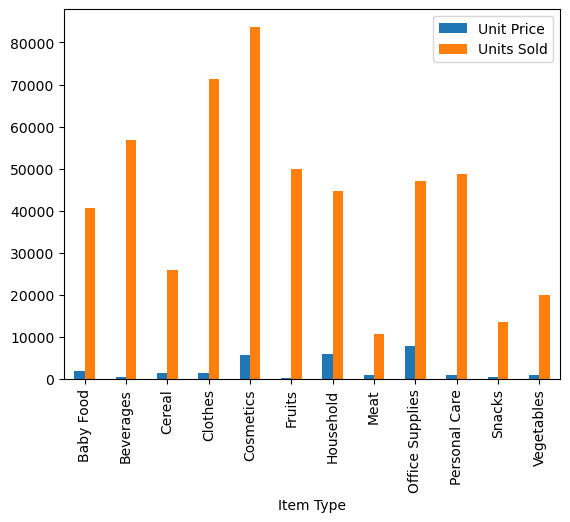

In [546]:
df.groupby(['Item Type'])[['Unit Price','Units Sold']].sum().plot(kind='bar')

In [122]:

3)Sales channel comparison

SyntaxError: unmatched ')' (1220217924.py, line 1)

In [547]:

#how do sales and conversion rates differ accross sales channel(eg offline vs offline)
df.groupby(['Sales Channel'])[['Total Revenue']].sum()

,Total Revenue
Sales Channel,
Offline,79094809.20
Online,58253959.11


<Axes: xlabel='Sales Channel'>

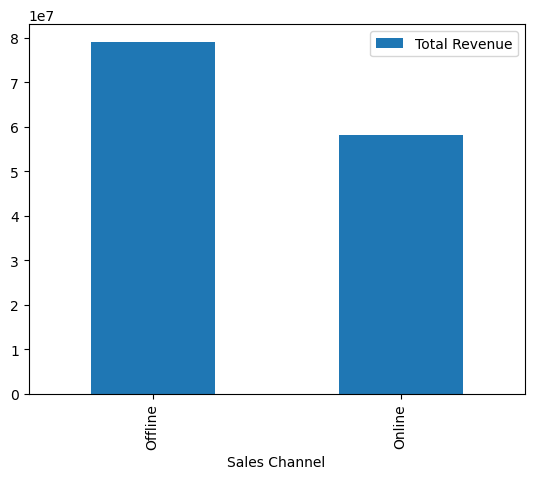

In [548]:
df.groupby(['Sales Channel'])[['Total Revenue']].sum().plot(kind='bar')

In [549]:
#which sales channel are most profitable
df.groupby(['Sales Channel'])[['profit margin m']].sum()

,profit margin m
Sales Channel,
Offline,4694.88
Online,3876.45


<Axes: xlabel='Sales Channel'>

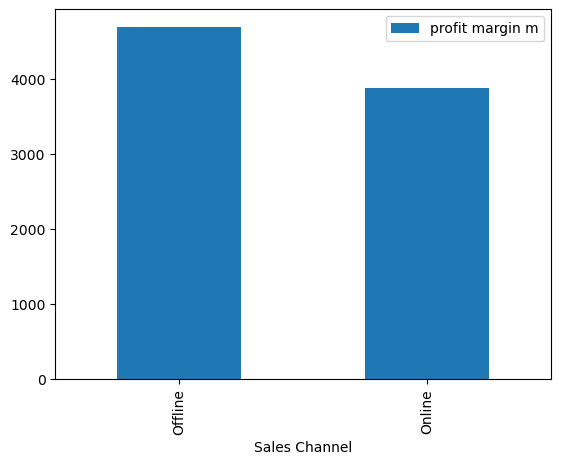

In [550]:
df.groupby(['Sales Channel'])[['profit margin m']].sum().plot(kind='bar')

In [551]:
5)PROFITABILITY ANALYSIS

SyntaxError: unmatched ')' (1397871896.py, line 1)

In [552]:
#HOW DO UNIT COST ,UNIT PRICE AND UNIT SOLD AFFECT TOTAL PROFIT FOR DIFFERNENT PRODUCT CATEGORIES ?
df.groupby(['Item Type'])[['Units Sold', 'Unit Price','Unit Cost','profit margin m']].sum()

,Units Sold,Unit Price,Unit Cost,profit margin m
Item Type,,,,
Baby Food,40545,1786.96,1115.94,671.02
Beverages,56708,379.60,254.32,125.28
Cereal,25877,1439.90,819.77,620.13
Clothes,71260,1420.64,465.92,954.72
Cosmetics,83718,5683.60,3423.29,2260.31
Fruits,49998,93.30,69.20,24.10
Household,44727,6014.43,4522.86,1491.57
Meat,10675,843.78,729.38,114.40
Office Supplies,46967,7814.52,6299.52,1515.00


In [553]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit', 'month m',
       'day m', 'year m', 'month name m', 'profit margin m'],
      dtype='object')

<Axes: xlabel='Item Type'>

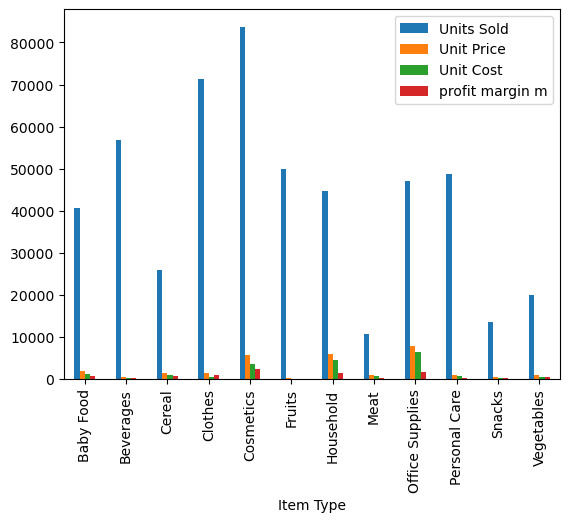

In [554]:
df.groupby(['Item Type'])[['Units Sold', 'Unit Price','Unit Cost','profit margin m']].sum().plot(kind='bar')

In [555]:
#me only-> single single relation

<Axes: xlabel='Sales Channel'>

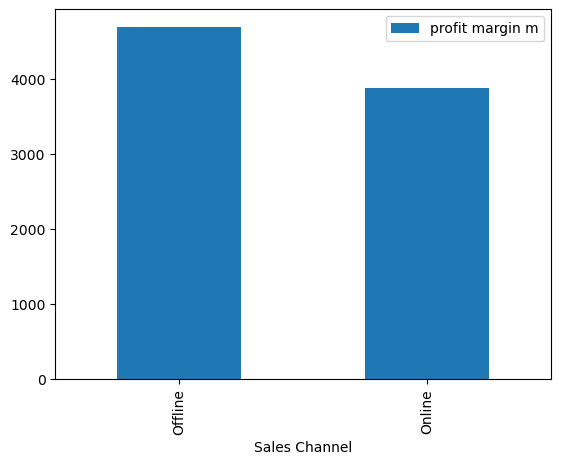

In [556]:
df.groupby(['Sales Channel'])[['profit margin m']].sum().plot(kind='bar')

In [557]:
# total profit by order category 

In [558]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit', 'month m',
       'day m', 'year m', 'month name m', 'profit margin m'],
      dtype='object')

In [559]:
df.groupby('Order Priority')['Total Profit'].sum().sort_values(ascending=False)

Order Priority
H    16891599.58
L    10858727.86
M     9669542.50
C     6748328.46
Name: Total Profit, dtype: float64

<Axes: xlabel='Order Priority'>

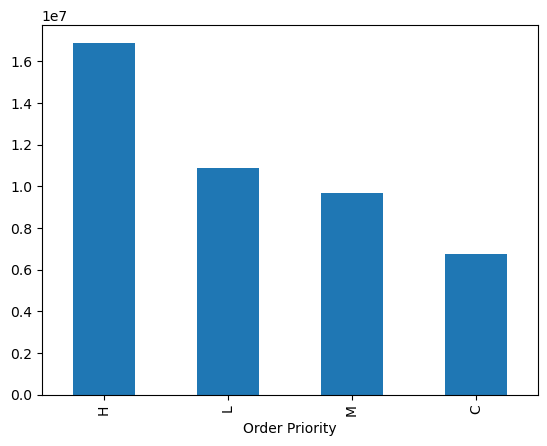

In [560]:
df.groupby('Order Priority')['Total Profit'].sum().sort_values(ascending=False).plot(kind='bar')

In [561]:
# total revenue by order category 

In [562]:
df.groupby('Order Priority')['Total Revenue'].sum().sort_values(ascending=False)

Order Priority
H    48749546.05
L    36628127.46
M    33116031.75
C    18855063.05
Name: Total Revenue, dtype: float64

<Axes: xlabel='Order Priority'>

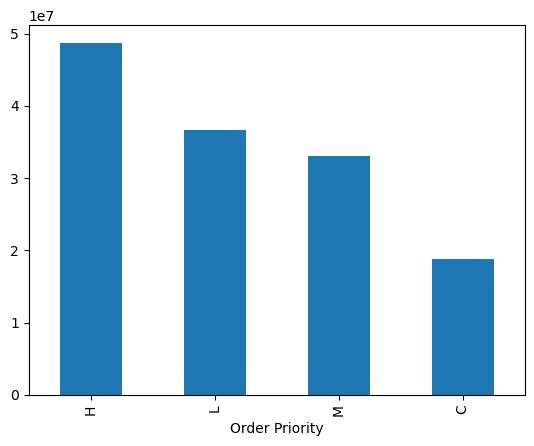

In [140]:
df.groupby('Order Priority')['Total Revenue'].sum().sort_values(ascending=False).plot(kind='bar')

In [563]:
# total unit sold by order category 

In [564]:
df.groupby('Order Priority')['Units Sold'].sum().sort_values(ascending=False)

Order Priority
H    154212
L    146876
C    116951
M     94832
Name: Units Sold, dtype: int64

<Axes: xlabel='Order Priority'>

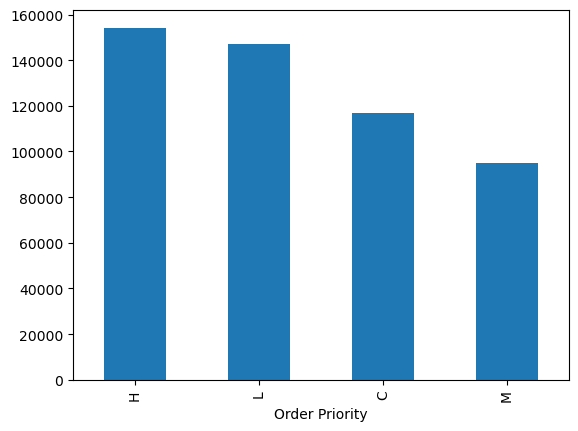

In [565]:
df.groupby('Order Priority')['Units Sold'].sum().sort_values(ascending=False).plot(kind='bar')

<Axes: >

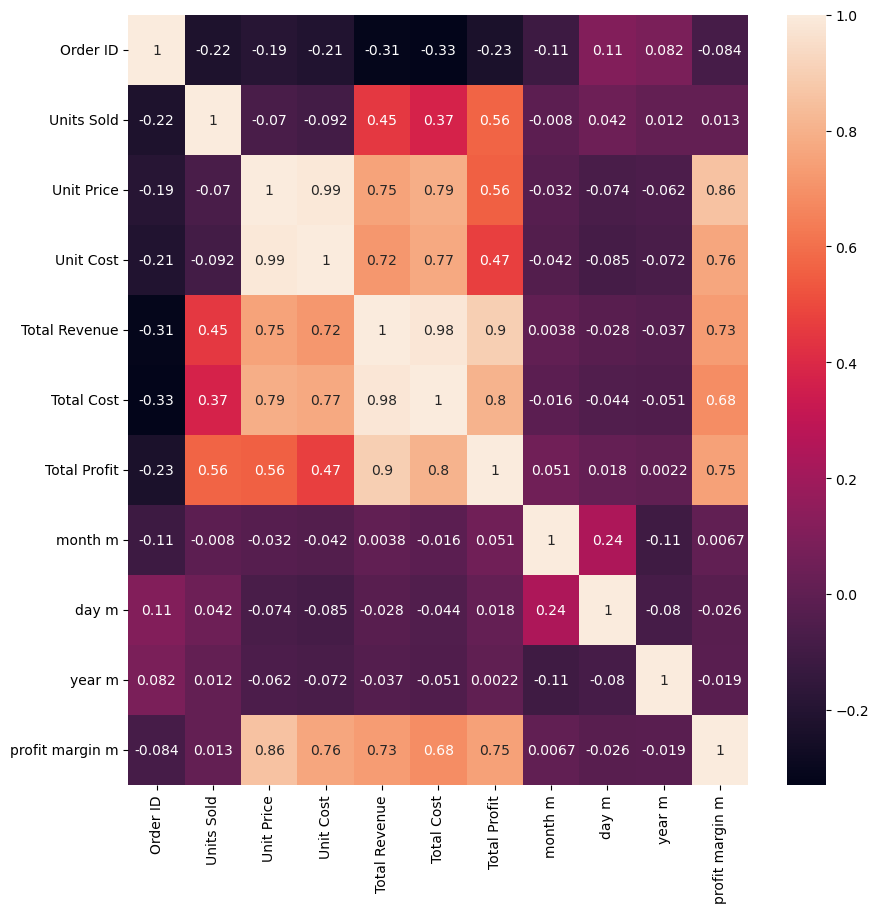

In [567]:
corr=df.select_dtypes(include=(np.number)).corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [ ]:
KEY INSIGHTS

In [ ]:
-->The year in the given dataset is between 2010 and 2017.

-->Sum of the units sold 5,12,871

-->Sum of total profit 44,168,198.40

-->Sum of total revenue 137,348,768.31

-->Sum of total cost 93,180,569.91

-->Maximum items have been sold in the year 2012.

-->Maximum revenue has also been generated in the year 2012.

-->Maximum profit margin has also been generated in the year 2012.

-->In month  of july highest sales was there throughout the years [2010 - 2017].

-->There is positive correlation between total revenue and total margin.

-->In this the offline sales channel is most profitable.

-->Clothes and Cosmetics items are sold most.

-->Cosmetics over all total revenue is maximum .

-->Cosmetics overall profit margin is higer than every one.

-->Sub-Saharan Africa is the region which has generated maximum profit.

-->Top 5 best sold products are Cosmetics ,Clothes,Office Supplies,Household ,Baby Food.

-->30% of the units sold are by the Order priority [H].

-->Total Cost is highly overall correlated with Total Profit 

-->Total Revenue is highly overall correlated with Total Cost

-->Unit Cost is highly overall correlated with Total Cost

-->Unit Price is highly overall correlated with Total Cost

-->Units Sold is highly overall correlated with Total Profit

In [147]:
# predict profit

In [ ]:
take the column which is moderate to high correlated  to the profit

In [149]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit', 'month m',
       'year m', 'month name m', 'profit margin m'],
      dtype='object')

<Axes: xlabel='Units Sold', ylabel='Total Profit'>

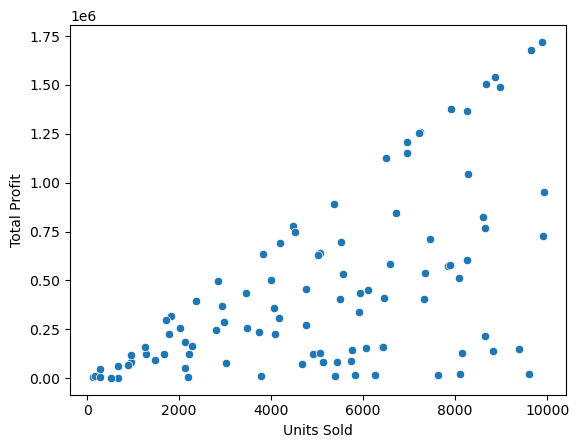

In [568]:
sns.scatterplot(x='Units Sold',y='Total Profit',data=df) # linear

<Axes: xlabel='Unit Price', ylabel='Total Profit'>

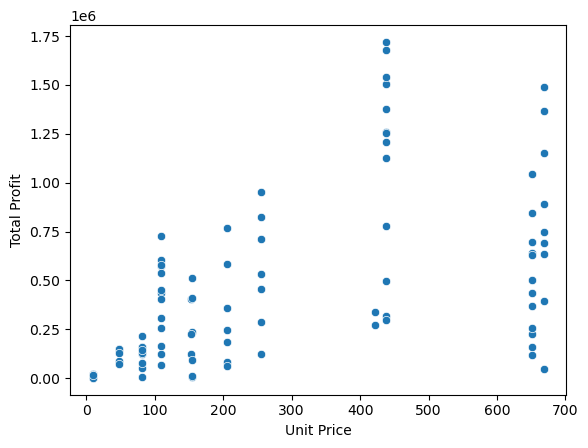

In [569]:
sns.scatterplot(x='Unit Price',y='Total Profit',data=df) #not linear

<Axes: xlabel='Total Revenue', ylabel='Total Profit'>

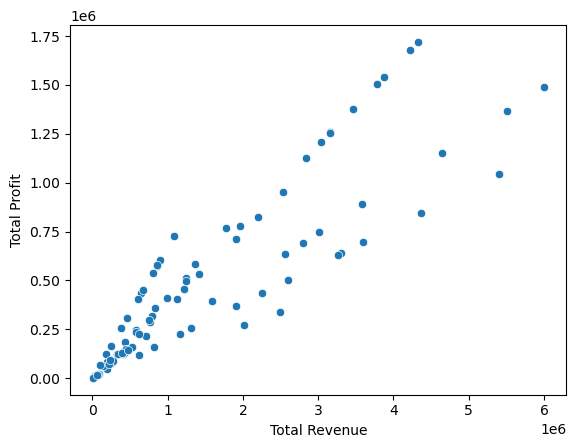

In [571]:
sns.scatterplot(x='Total Revenue',y='Total Profit',data=df)

<Axes: xlabel='Total Cost', ylabel='Total Profit'>

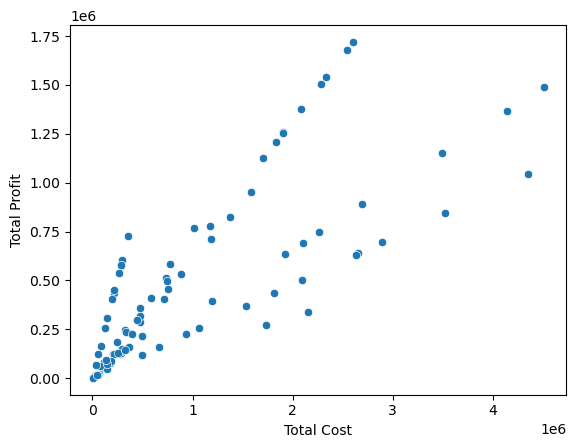

In [572]:
sns.scatterplot(x='Total Cost',y='Total Profit',data=df)

<Axes: xlabel='Unit Cost', ylabel='Total Profit'>

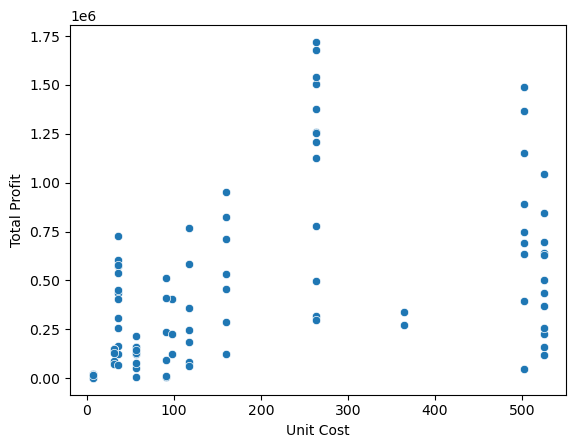

In [573]:
sns.scatterplot(x='Unit Cost',y='Total Profit',data=df)

In [3]:
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [17]:
df2=df[['Units Sold','Unit Price','Total Revenue','Total Cost']]
df2

,Units Sold,Unit Price,Total Revenue,Total Cost
0,9925,255.28,2533654.00,1582243.50
1,2804,205.70,576782.80,328376.44
2,1779,651.21,1158502.59,933903.84
3,8102,9.33,75591.66,56065.84
4,5062,651.21,3296425.02,2657347.52
...,...,...,...,...
95,888,109.28,97040.64,31825.92
96,6267,9.33,58471.11,43367.64
97,1485,154.06,228779.10,135031.05
98,5767,81.73,471336.91,326815.89


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.linear_model  import Ridge

In [19]:
x=df2

In [20]:
y=df['Total Profit']

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=30)

In [22]:
x_train

,Units Sold,Unit Price,Total Revenue,Total Cost
26,5398,9.33,50363.34,37354.16
5,2974,255.28,759202.72,474115.08
25,1815,437.20,793518.00,477943.95
83,4085,152.58,623289.30,398042.40
22,2225,152.58,339490.50,216804.00
36,3784,9.33,35304.72,26185.28
66,8656,81.73,707454.88,490535.52
47,273,81.73,22312.29,15470.91
86,8829,47.45,418936.05,280673.91
9,6593,205.70,1356180.10,772106.23


In [23]:
x_test

,Units Sold,Unit Price,Total Revenue,Total Cost
20,7450,255.28,1901836.00,1187679.00
91,9389,47.45,445508.05,298476.31
34,7327,152.58,1117953.66,713942.88
52,4063,205.70,835759.10,475817.93
8,6070,81.73,496101.10,343986.90
74,9892,437.20,4324782.40,2604860.36
21,1273,255.28,324971.44,202941.66
88,522,9.33,4870.26,3612.24
80,4513,668.27,3015902.51,2267963.02
89,4660,47.45,221117.00,148141.40


In [25]:
y_test

20     714157.00
91     147031.74
34     404010.78
52     359941.17
8      152114.20
74    1719922.04
21     122029.78
88       1258.02
80     747939.49
89      72975.60
82    1128242.43
38     846885.00
0      951410.50
77     235601.16
42     187545.03
67     403773.12
68    1046233.75
92     255151.25
48     575916.48
10       7828.12
93    1375311.70
4      639077.50
51      23150.46
72      89904.06
1      248406.36
87     532885.74
78     825738.04
24     127054.20
71       1621.93
54      18405.17
95      65214.72
32     369155.00
63     449159.04
69     539196.48
29     392780.10
30    1505888.07
19     337937.60
60      60418.38
59    1254472.05
43      10795.23
Name: Total Profit, dtype: float64

In [27]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [28]:
model.predict(x_test)
# model.predict(x_test)

array([7.14157000e+05, 1.47031740e+05, 4.04010780e+05, 3.59941170e+05,
       1.52114200e+05, 1.71992204e+06, 1.22029780e+05, 1.25802000e+03,
       7.47939490e+05, 7.29756000e+04, 1.12824243e+06, 8.46885000e+05,
       9.51410500e+05, 2.35601160e+05, 1.87545030e+05, 4.03773120e+05,
       1.04623375e+06, 2.55151250e+05, 5.75916480e+05, 7.82812000e+03,
       1.37531170e+06, 6.39077500e+05, 2.31504600e+04, 8.99040600e+04,
       2.48406360e+05, 5.32885740e+05, 8.25738040e+05, 1.27054200e+05,
       1.62193000e+03, 1.84051700e+04, 6.52147200e+04, 3.69155000e+05,
       4.49159040e+05, 5.39196480e+05, 3.92780100e+05, 1.50588807e+06,
       3.37937600e+05, 6.04183800e+04, 1.25447205e+06, 1.07952300e+04])

In [38]:
model.predict([[1779,651.21,1158502.59,933903.84]])

C:\Users\sahus\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([224598.75])

In [40]:
model.predict([[2804,205.70,576782.80,328376.44]])

C:\Users\sahus\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([248406.36])

In [114]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='p1(i).html')

C:\Users\sahus\AppData\Local\Temp\ipykernel_7184\2836551062.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport
C:\Users\sahus\anaconda3\Lib\site-packages\ydata_profiling\profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [120]:
pd.crosstab(columns=df.iloc[:,2:])

TypeError: crosstab() missing 1 required positional argument: 'index'

In [125]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit', 'day m',
       'month m', 'year m', 'month name m', 'profit margin m'],
      dtype='object')

In [ ]:
plt.figure(figsize=(10,4))